## PTID-CDS-JUN22-1329

## PRCP-1004-Fifa20

## Problem Statement:
#### "Using clustering algorithms to categorize similar players using their traits and their different skills in the field."


### About Dataset
#### This data set includes 
* more than 18K Fifa20 Players with 104 features . 
* Player positions, with the role in the club and in the national team
* Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.
* Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.


 ### Technique Used
 * In this project we explore the data through the domain of unsupervised learning performing principal component analysis and clustering analysis.
One goal of this project is to best describe the variation in the different types of players. Doing so would equip us with insight into how to  choose best players in a team. 
In a high-dimensional data, it is often difficult to develop an intuition of the features and our goal in this project is to reduce the dimensionality of the dataset so that 
we can visualize the relationships between the features and clusters in our dataset. We start with 104 features and bring down the dimensionality to 60 features by selecting key features 
using our domain knowledge, and then further to just two principal components using PCA. 
We visualize the data using these principal components, perform clustering analysis and visualize the clusters and develop an inference for the same.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

### Basic Checks

In [2]:
data= pd.read_csv("players_20.csv")
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [4]:
data.shape

(18278, 104)

In [5]:
#insights : There are 18278 rows and 104 columns in the dataset.

In [6]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [7]:
# insights:there are nan values in few columns.Wage_eur and value_eur have minimum value 0.There are  discrete numeric
#          columns also

In [8]:
data.describe (include="O")

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,...,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,...,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,...,682,636,636,636,682,667,621,621,621,667


In [9]:
# insights:1667 players are of England.There are 698 unique clubs with FC Barcelona on the top with 33 entries.
#           Mostly players preferred foot is right foot.Most of the end columns represent playing positions of footballers

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [11]:
#insights: 16 columns have float,45columns have integers and 43 columns have object columns

### Exploratory Data Analysis

In [12]:
Player_Salary=data[['short_name','wage_eur',"overall"]]
Player_Salary.head()

,short_name,wage_eur,overall
0,L. Messi,565000,94
1,Cristiano Ronaldo,405000,93
2,Neymar Jr,290000,92
3,J. Oblak,125000,91
4,E. Hazard,470000,91


In [13]:
Player_Salary=Player_Salary.sort_values(by =['wage_eur'],ascending=False)
Player_Salary.head()

,short_name,wage_eur,overall
0,L. Messi,565000,94
4,E. Hazard,470000,91
1,Cristiano Ronaldo,405000,93
5,K. De Bruyne,370000,91
22,A. Griezmann,370000,89


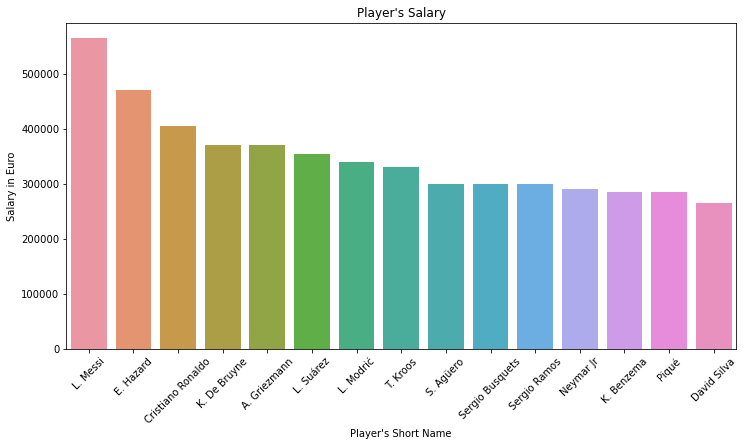

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot( x = "short_name",y = "wage_eur", data = Player_Salary[:15])
plt.title("Player's Salary")
plt.xlabel("Player's Short Name")
plt.ylabel("Salary in Euro")
plt.xticks(rotation=45)
plt.show()

In [15]:
#Insights: Messi wage_euro is highest followed by Hazard and Ronaldo.

In [16]:
Player_age=data[['short_name','age']]
Player_age.head()

,short_name,age
0,L. Messi,32
1,Cristiano Ronaldo,34
2,Neymar Jr,27
3,J. Oblak,26
4,E. Hazard,28


In [17]:
Player_age=Player_age.sort_values (by=['age'],ascending=False)
Player_age.head()

,short_name,age
13003,H. Sulaimani,42
11832,C. Muñoz,42
200,G. Buffon,41
3706,C. Lucchetti,41
10665,F. Kippe,41


In [18]:
data.age.min()

16

In [19]:
#insights:Maximum age of player's is 42 and 2 players are of this age.Minimum age of players is 16

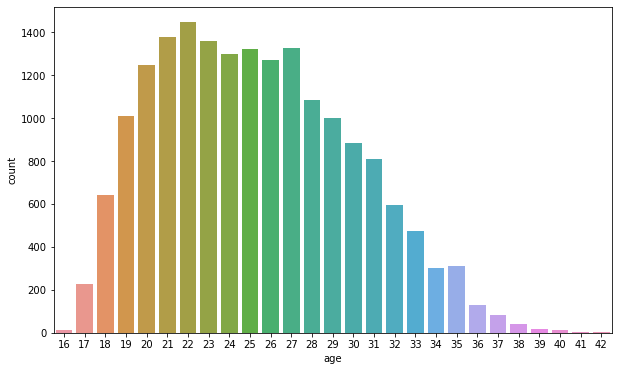

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x="age",data=data,)
plt.show()

In [21]:
#insights: most of the players are of age group 20 to 27.

In [22]:
data.loc[(data['age']<18) & (data['wage_eur']>5000)]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
7690,246147,https://sofifa.com/player/246147/mason-greenwo...,M. Greenwood,Mason Greenwood,17,2001-10-01,187,65,England,Manchester United,...,52+2,50+2,50+2,50+2,52+2,50+2,45+2,45+2,45+2,50+2


In [23]:
#Insights:M.greenwood is  the only youngest player of 17yrs with salary 6000 euros

In [24]:
Player_wt=data[['short_name','age','weight_kg','overall']]
Player_wt.head()

,short_name,age,weight_kg,overall
0,L. Messi,32,72,94
1,Cristiano Ronaldo,34,83,93
2,Neymar Jr,27,68,92
3,J. Oblak,26,87,91
4,E. Hazard,28,74,91


In [25]:
Player_wt=Player_wt.sort_values (by=['weight_kg'],ascending=True)
Player_wt.head()

,short_name,age,weight_kg,overall
13070,B. Al Mutairi,29,50,63
17022,M. Abdullah,24,52,56
4982,D. Rojas,24,52,70
10114,Isi Ros,23,53,65
17078,J. García,17,53,55


In [26]:
# insights:B.Al Mutairi is lightest player

In [27]:
Player_wt=Player_wt.sort_values (by=['weight_kg'],ascending=False)
Player_wt.head()

,short_name,age,weight_kg,overall
10693,A. Akinfenwa,37,110,65
9572,C. Seitz,32,107,66
7439,F. Farnolle,34,104,68
15064,E. Louro,23,104,60
13576,L. Watkowiak,23,103,62


In [28]:
# insights: A .Akinfenwa is the heaviest player

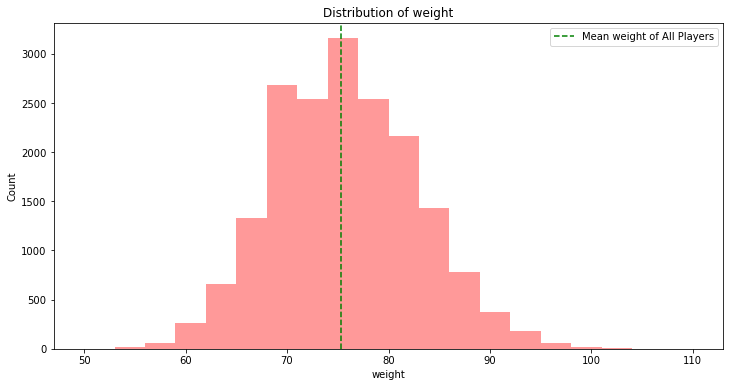

In [29]:
plt.figure(figsize=(12,6))
sns.distplot(a=data['weight_kg'],kde=False,bins=20,color='red')
plt.axvline(x=np.mean(data['weight_kg']),c='green',ls='--',label='Mean weight of All Players')
plt.legend()
plt.xlabel('weight')
plt.ylabel('Count')
plt.title('Distribution of weight')
plt.show()

In [30]:
data.weight_kg.mean()

75.2763431447642

In [31]:
#insights:Mean wt.of players is 75.2kg

In [32]:
Player_ht=data[['short_name','age','height_cm','overall']]

In [33]:
Player_ht=Player_ht.sort_values (by=['height_cm'],ascending=False)
Player_ht.head()

,short_name,age,height_cm,overall
9208,T. Holý,27,205,66
8200,A. Ba,25,203,67
12808,A. Chapman,29,203,63
3121,C. Pantilimon,32,203,73
12864,M. Qvist,26,203,63


In [34]:
# insights: T. Holy is tallest player in the data

In [35]:
Player_ht=Player_ht.sort_values (by=['height_cm'],ascending=True)
Player_ht.head()

,short_name,age,height_cm,overall
4829,N. Barrios,21,156,70
3898,J. Plata,27,157,72
4243,C. Songkrasin,25,158,71
1496,M. Moralez,32,158,76
16929,J. Nisbet,20,158,56


In [36]:
# insights:N.Barrios is shortest player

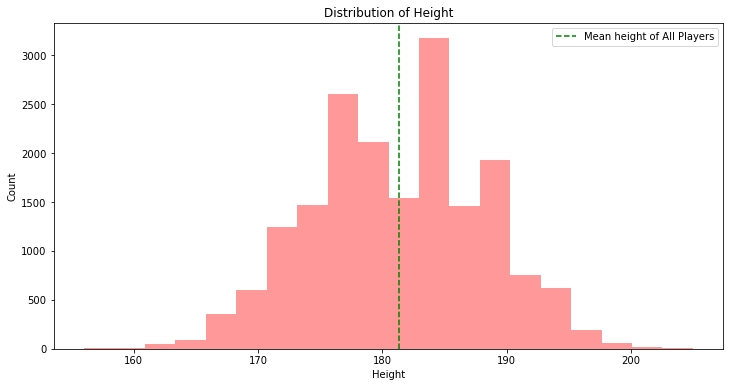

In [37]:
plt.figure(figsize=(12,6))
sns.distplot(a=data['height_cm'],kde=False,bins=20,color='red')
plt.axvline(x=np.mean(data['height_cm']),c='green',ls='--',label='Mean height of All Players')
plt.legend()
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Distribution of Height')
plt.show()

In [38]:
data.height_cm.mean()

181.36218404639456

In [39]:
 Nationality= data.nationality.value_counts()[0:15]
Nationality

England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
Brazil                  824
Italy                   732
Colombia                591
Japan                   453
Netherlands             416
China PR                373
Chile                   370
Sweden                  358
Norway                  350
Republic of Ireland     348
Name: nationality, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Spain'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Argentina'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'Colombia'),
  Text(8, 0, 'Japan'),
  Text(9, 0, 'Netherlands'),
  Text(10, 0, 'China PR'),
  Text(11, 0, 'Chile'),
  Text(12, 0, 'Sweden'),
  Text(13, 0, 'Norway'),
  Text(14, 0, 'Republic of Ireland')])

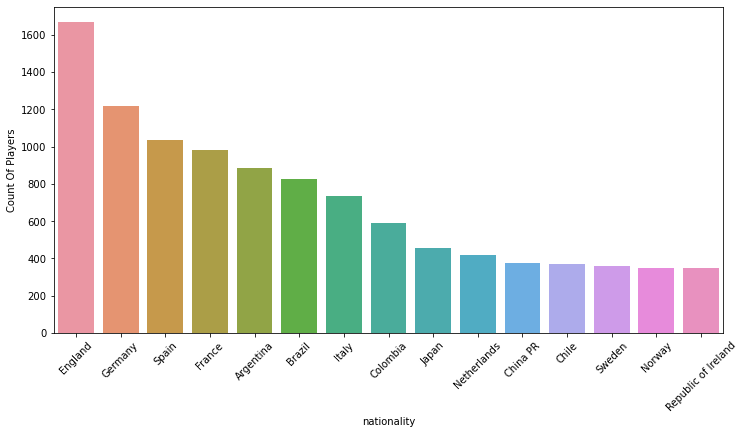

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot( x = Nationality.index,
             y =Nationality,data=data)
plt.xlabel("nationality")
plt.ylabel("Count Of Players")
plt.xticks(rotation=45)

In [41]:
# insights: Most of the players are of England

In [42]:
#insights: most of the players are of age group 20 to 27.

In [43]:
Player_Repu=data[['short_name','international_reputation',"value_eur"]]
Player_Repu.head()

,short_name,international_reputation,value_eur
0,L. Messi,5,95500000
1,Cristiano Ronaldo,5,58500000
2,Neymar Jr,5,105500000
3,J. Oblak,3,77500000
4,E. Hazard,4,90000000


In [44]:
Player_Repu=Player_Repu.sort_values(by="value_eur",ascending=False)
Player_Repu.head()

,short_name,international_reputation,value_eur
2,Neymar Jr,5,105500000
0,L. Messi,5,95500000
10,K. Mbappé,3,93500000
5,K. De Bruyne,4,90000000
4,E. Hazard,4,90000000


In [45]:
# imsights:Neymar has max val_eur

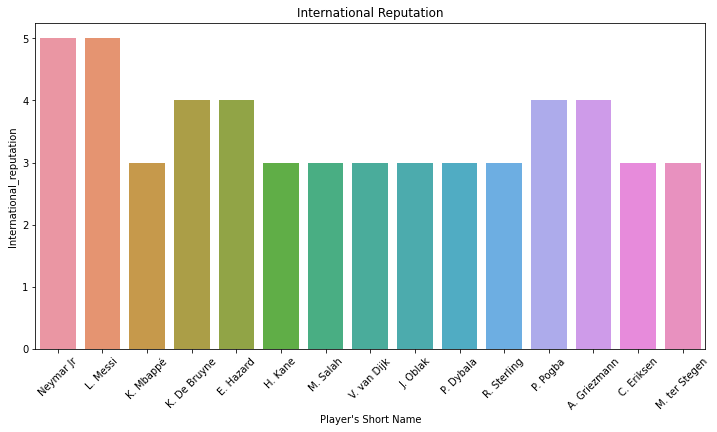

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot( x = "short_name",y = "international_reputation", data = Player_Repu[:15])
plt.title('International Reputation')
plt.xlabel("Player's Short Name")
plt.ylabel("International_reputation")
plt.xticks(rotation=45)
plt.show()

In [47]:
# insights: Five players have topmost international ranking 5

In [48]:
player_defending=data[['short_name','defending']]
player_defending1=player_defending.sort_values(by="defending",ascending=False)
player_defending1.head()

,short_name,defending
16,G. Chiellini,90.0
7,V. van Dijk,90.0
11,K. Koulibaly,89.0
35,D. Godín,89.0
49,M. Hummels,89.0


In [49]:
#insights:Chiellini and Dijk has the highest defending rate

In [50]:
player_shooting=data[['short_name','shooting']]
player_shooting1=player_shooting.sort_values(by="shooting",ascending=False)
player_shooting1.head()

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
205,F. Quagliarella,89.0


In [51]:
#insights: Ronaldo tops in shooting

<AxesSubplot:ylabel='preferred_foot'>

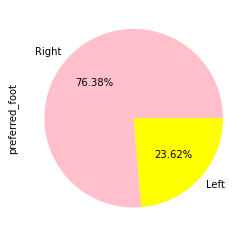

In [52]:
data['preferred_foot'].value_counts().plot.pie(figsize = (4,5), autopct = '%.2f%%',colors=['pink','yellow'])

In [53]:
#Insights: Right is most preferred foot of players

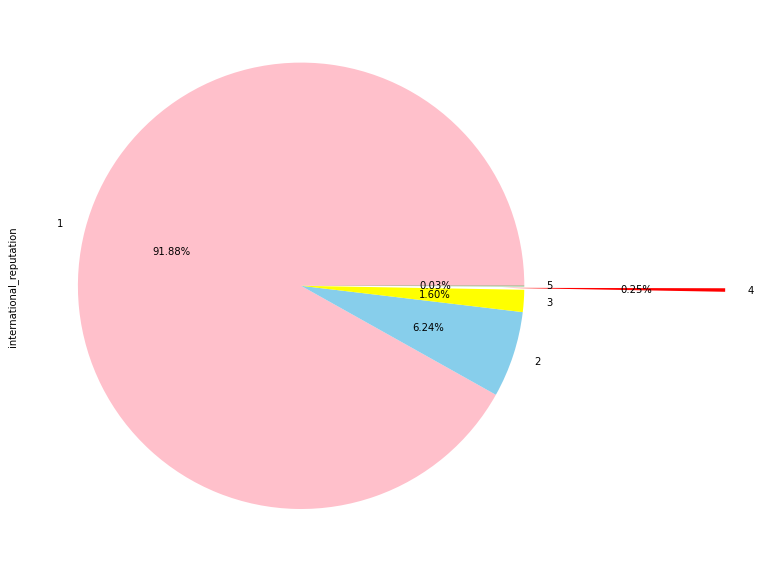

<Figure size 432x288 with 0 Axes>

In [54]:
data['international_reputation'].value_counts().plot.pie(figsize = (10,20), autopct = '%.2f%%',explode=[0,0,0,0.9,0],
colors=['pink',"skyblue",'yellow',"red","green"])
plt.show()
plt.tight_layout()

In [55]:
#insights:around 92% data has internationalreputaton 1

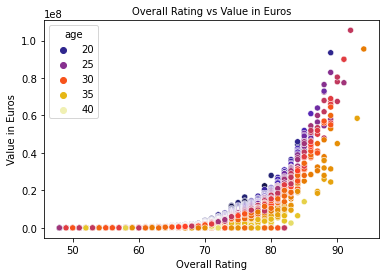

In [56]:
sns.scatterplot(x='overall',y='value_eur',hue='age',palette='CMRmap',sizes=(10,200), data=data)
plt.title('Overall Rating vs Value in Euros',fontsize = 10)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

In [57]:
#insights: players with more overall rating has more value in euros.

In [58]:
Goalkeeper=data.loc[data.team_position=="GK"]
Goalkeeper.sort_values(by="overall", ascending=False).head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramses Becker,26,1992-10-02,191,91,Brazil,Liverpool,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,28,1990-11-07,192,82,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,162835,https://sofifa.com/player/162835/samir-handano...,S. Handanovič,Samir Handanovič,34,1984-07-14,193,92,Slovenia,Inter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#insights=J.oblak has maximum overall rating among goalkeepers

In [60]:
player_attributes=data[['short_name',"overall","potential","pace","shooting","passing","dribbling","defending","physic"]]
player_attributes=player_attributes.sort_values(by="overall",ascending=False)
player_attributes.head()

,short_name,overall,potential,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,94,94,87.0,92.0,92.0,96.0,39.0,66.0
1,Cristiano Ronaldo,93,93,90.0,93.0,82.0,89.0,35.0,78.0
2,Neymar Jr,92,92,91.0,85.0,87.0,95.0,32.0,58.0
3,J. Oblak,91,93,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,91,91,91.0,83.0,86.0,94.0,35.0,66.0


In [61]:
# insights: J.oblak has nan values in last columns because he is a goalkeeper.Messi performed better than Ronaldo
#            in 5 factors out of 8 factors

In [62]:
print(list(data.loc[data['potential'] == data['potential'].max()]['short_name'])[0],'is the  player of maximum potential',data['potential'].max())

K. Mbappé is the  player of maximum potential 95


In [63]:
print(list(data.loc[data['pace'] == data['pace'].max()]['short_name'])[0],'is the  player of maximum pace',data['pace'].max())

K. Mbappé is the  player of maximum pace 96.0


<AxesSubplot:xlabel='age', ylabel='power_stamina'>

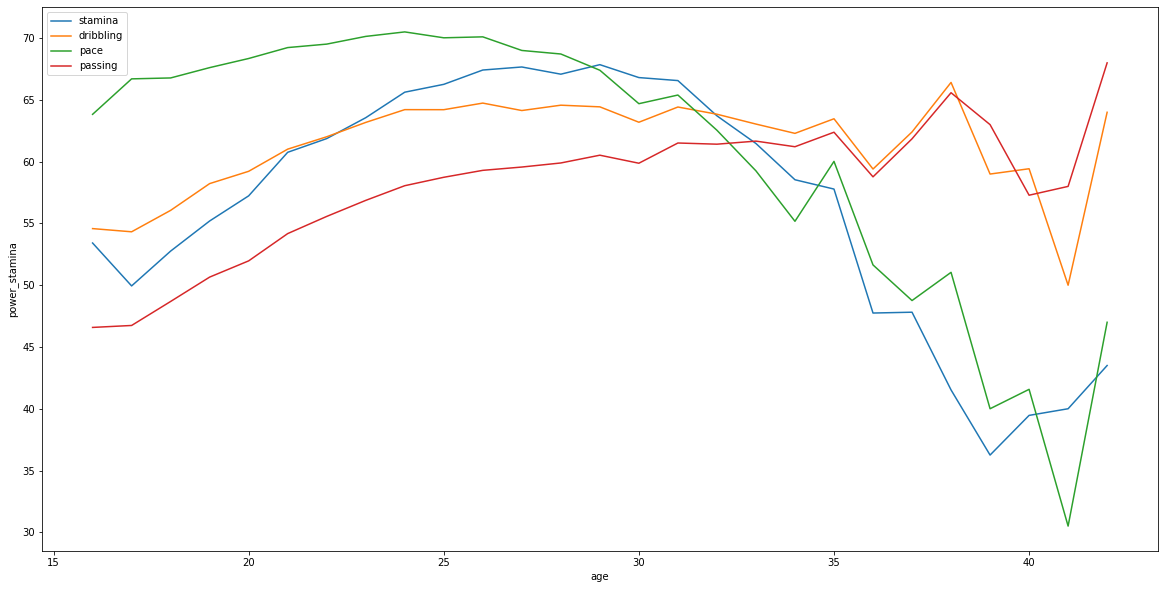

In [64]:
plt.figure(figsize = (20,10))
sns.lineplot(x='age', y='power_stamina', data=data, legend='brief', label='stamina',ci=None)
sns.lineplot(x='age', y='dribbling', data=data, legend='brief', label='dribbling',ci=None)
sns.lineplot(x='age', y='pace', data=data, legend='brief', label='pace',ci=None)
sns.lineplot(x='age', y='passing', data=data, legend='brief', label='passing',ci=None)



In [65]:
# insights :Pace & stamina start decreasing after age of 30 yrs

Text(0.5, 1.0, 'Heatmap')

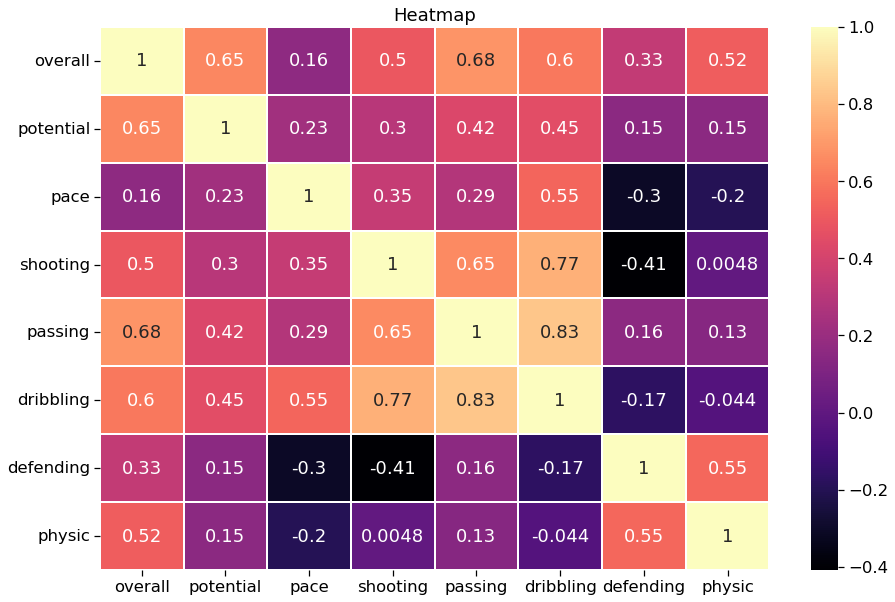

In [66]:
Attributes =data[["overall","potential","pace","shooting","passing","dribbling","defending","physic"]]
plt.figure(figsize = (15, 10))
sns.set_context('notebook',font_scale=1.5)
sns.heatmap(Attributes.corr(),annot=True ,cmap="magma",linewidth=2)
plt.title("Heatmap")

In [67]:
#insights=Overall rating is highly correlated with potential and passing.Dribbling and shooting are highly +vely correlated
#

### Data Preprocessing

In [68]:
data1=data.copy()

In [69]:
data1.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [70]:
data1.describe().columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [71]:
df=data1[["short_name" ,'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
      'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [72]:
df.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8


In [73]:
df.tail()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
18273,Shao Shuai,22,186,79,48,56,40000,2000,1,3,...,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,22,177,66,48,56,40000,2000,1,2,...,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,19,186,75,48,56,40000,1000,1,2,...,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,18,185,74,48,54,40000,1000,1,2,...,36,40,39,44,54,14,9,13,13,13
18277,Pan Ximing,26,182,78,48,51,40000,2000,1,3,...,38,42,52,42,48,8,12,14,9,10


In [74]:
df1=df.loc[df['overall']>86]
df1

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,28,181,70,91,91,90000000,370000,4,5,...,79,91,68,58,51,15,13,5,10,13
6,M. ter Stegen,27,187,85,90,93,67500000,250000,3,4,...,25,70,25,13,10,88,85,88,88,90
7,V. van Dijk,27,193,92,90,91,78000000,200000,3,3,...,62,89,91,92,85,13,10,13,11,11
8,L. Modrić,33,172,66,90,90,45000000,340000,4,4,...,82,92,68,76,71,13,9,7,14,9
9,M. Salah,27,175,71,90,90,80500000,240000,3,3,...,77,91,38,43,41,14,14,9,11,14


In [75]:
pd.set_option("display.max_columns",None)

In [76]:
pd.set_option("display.max_rows",None)

In [77]:
df1.isnull().sum()

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
nation_jersey_number          21
pace                          10
shooting                      10
passing                       10
dribbling                     10
defending                     10
physic                        10
gk_diving                     45
gk_handling                   45
gk_kicking                    45
gk_reflexes                   45
gk_speed                      45
gk_positioning                45
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_

In [78]:
df1.mean()

age                           2.916364e+01
height_cm                     1.823636e+02
weight_kg                     7.838182e+01
overall                       8.854545e+01
potential                     8.932727e+01
value_eur                     5.601818e+07
wage_eur                      2.326364e+05
international_reputation      3.509091e+00
weak_foot                     3.454545e+00
skill_moves                   3.000000e+00
release_clause_eur            1.070327e+08
team_jersey_number            9.963636e+00
contract_valid_until          2.021836e+03
nation_jersey_number          8.529412e+00
pace                          7.548889e+01
shooting                      7.466667e+01
passing                       7.884444e+01
dribbling                     8.197778e+01
defending                     6.133333e+01
physic                        7.377778e+01
gk_diving                     8.750000e+01
gk_handling                   8.510000e+01
gk_kicking                    8.000000e+01
gk_reflexes

In [79]:
df2=df1.fillna(df1.mean())

In [80]:
df2.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attackin

In [81]:
df2.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,8.529412,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.000000,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,87.5,85.1,80.0,89.2,54.4,86.4,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.000000,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87.5,85.1,80.0,89.2,54.4,86.4,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.000000,75.488889,74.666667,78.844444,81.977778,61.333333,73.777778,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.000000,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [82]:
names=df2.short_name.tolist()
df3=df2.drop("short_name",axis=1)

In [83]:
df3.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,8.529412,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.000000,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,87.5,85.1,80.0,89.2,54.4,86.4,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.000000,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87.5,85.1,80.0,89.2,54.4,86.4,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.000000,75.488889,74.666667,78.844444,81.977778,61.333333,73.777778,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.000000,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [84]:
df3.tail()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
50,30,186,81,87,87,41000000,155000,3,3,2,75900000.0,4.0,2020.0,2.000000,64.000000,55.000000,72.000000,66.000000,88.000000,79.000000,87.5,85.1,80.0,89.2,54.4,86.4,64,45,82,79,38,62,63,69,85,75,61,66,59,87,50,78,84,78,79,58,81,88,54,62,58,86,90,90,86,16,6,14,16,14
51,30,170,68,87,87,40000000,240000,3,3,3,82000000.0,18.0,2024.0,18.000000,90.000000,69.000000,81.000000,83.000000,79.000000,73.000000,87.5,85.1,80.0,89.2,54.4,86.4,87,73,70,84,60,81,80,63,79,85,91,90,89,85,85,64,81,92,61,66,77,83,83,78,59,82,74,83,84,13,15,13,6,13
52,28,174,70,87,87,50000000,180000,3,3,5,82500000.0,6.0,2021.0,10.000000,69.000000,74.000000,85.000000,90.000000,69.000000,63.000000,87.5,85.1,80.0,89.2,54.4,86.4,78,69,54,90,86,90,85,77,87,91,76,64,91,86,88,76,76,75,59,79,56,83,79,86,75,87,67,67,71,6,11,7,9,13
53,32,185,80,87,87,30500000,195000,3,3,1,62500000.0,1.0,2020.0,8.529412,75.488889,74.666667,78.844444,81.977778,61.333333,73.777778,90.0,81.0,75.0,90.0,53.0,82.0,11,15,11,30,11,16,11,15,37,19,54,53,60,84,61,56,74,39,75,13,32,20,16,68,25,67,28,14,14,90,81,75,82,90
54,28,163,59,87,87,52000000,140000,3,4,4,88400000.0,24.0,2022.0,10.000000,89.000000,79.000000,85.000000,91.000000,35.000000,47.000000,87.5,85.1,80.0,89.2,54.4,86.4,86,77,59,87,74,90,87,77,78,93,94,85,94,84,93,79,52,72,40,85,34,26,85,89,68,83,49,24,22,8,4,14,9,10


In [85]:
df3

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,8.529412,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.000000,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,87.5,85.1,80.0,89.2,54.4,86.4,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.000000,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87.5,85.1,80.0,89.2,54.4,86.4,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.000000,75.488889,74.666667,78.844444,81.977778,61.333333,73.777778,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.000000,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
5,28,181,70,91,91,90000000,370000,4,5,4,166500000.0,17.0,2023.0,7.000000,76.000000,86.000000,92.000000,86.000000,61.000000,78.000000,87.5,85.1,80.0,89.2,54.4,86.4,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13
6,27,187,85,90,93,67500000,250000,3,4,1,143400000.0,1.0,2022.0,22.000000,75.488889,74.666667,78.844444,81.977778,61.333333,73.777778,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90
7,27,193,92,90,91,78000000,200000,3,3,2,150200000.0,4.0,2023.0,4.000000,77.000000,60.000000,70.000000,71.000000,90.000000,86.000000,87.5,85.1,80.0,89.2,54.4,86.4,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11
8,33,172,66,90,90,45000000,340000,4,4,4,92300000.0,10.0,2020.0,8.529412,74.000000,76.000000,89.000000,89.000000,72.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9
9,27,175,71,90,90,80500000,240000,3,3,4,148900000.0,11.0,2023.0,10.000000,93.000000,86.000000,81.000000,89.000000,45.000000,74.000000,87.5,85.1,80.0,89.2,54.4,86.4,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14


In [86]:
df3.shape

(55, 60)

### Model Creation

In [87]:
X= df3.iloc[:,:] 
X.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,8.529412,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.000000,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,87.5,85.1,80.0,89.2,54.4,86.4,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.000000,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87.5,85.1,80.0,89.2,54.4,86.4,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.000000,75.488889,74.666667,78.844444,81.977778,61.333333,73.777778,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.000000,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [88]:
sc=MinMaxScaler()
X_scaled= sc.fit_transform(X)
X_norm=pd.DataFrame(X_scaled)

In [89]:
X_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.857143,0.194444,0.351351,1.000000,0.875,0.885057,1.000000,1.000000,0.75,0.75,1.000000,0.300000,0.25,0.358543,0.833333,0.984615,1.000000,1.000000,0.120690,0.452381,0.5,0.372727,0.48,0.44,0.522222,0.550,0.939024,1.000000,0.731707,1.000000,0.974684,1.000000,1.000000,1.000000,1.000000,1.0000,0.913793,0.781818,0.949153,0.933333,1.000000,0.795455,0.584615,0.661538,0.517857,1.000000,0.367647,0.358025,0.988235,1.000000,0.810127,1.000000,0.227848,0.329268,0.219512,0.034483,0.089888,0.142857,0.116279,0.056180
1,1.000000,0.666667,0.648649,0.857143,0.750,0.459770,0.648352,1.000000,0.75,1.00,0.385520,0.200000,0.50,0.285714,0.888889,1.000000,0.736842,0.805556,0.051724,0.738095,0.5,0.372727,0.48,0.44,0.522222,0.550,0.890244,0.988235,0.963415,0.854839,0.962025,0.908046,0.853659,0.785714,0.741379,0.9500,0.879310,0.909091,0.847458,1.000000,0.600000,1.000000,1.000000,0.815385,0.696429,0.988095,0.588235,0.222222,1.000000,0.812500,0.936709,0.967742,0.164557,0.268293,0.195122,0.045977,0.089888,0.142857,0.116279,0.089888
2,0.500000,0.333333,0.243243,0.714286,0.625,1.000000,0.395604,1.000000,1.00,1.00,0.996287,0.300000,0.50,0.428571,0.907407,0.876923,0.868421,0.972222,0.000000,0.261905,0.5,0.372727,0.48,0.44,0.522222,0.550,0.926829,0.905882,0.634146,0.919355,0.962025,0.988506,0.939024,0.916667,0.810345,0.9875,0.965517,0.872727,1.000000,0.733333,0.816667,0.659091,0.476923,0.753846,0.178571,0.880952,0.411765,0.308642,0.905882,0.937500,1.000000,0.935484,0.151899,0.195122,0.256098,0.068966,0.067416,0.142857,0.127907,0.089888
3,0.428571,0.694444,0.756757,0.571429,0.750,0.678161,0.032967,0.333333,0.50,0.00,0.807550,0.400000,0.75,0.000000,0.620165,0.717949,0.653801,0.610494,0.505747,0.637566,0.4,1.000000,0.40,0.40,0.388889,1.000,0.024390,0.011765,0.060976,0.209677,0.025316,0.022989,0.024390,0.047619,0.103448,0.1750,0.086207,0.345455,0.508475,0.466667,0.233333,0.181818,0.738462,0.138462,0.696429,0.023810,0.161765,0.098765,0.011765,0.546875,0.000000,0.096774,0.151899,0.024390,0.121951,0.965517,1.000000,0.835165,1.000000,0.966292
4,0.571429,0.333333,0.405405,0.571429,0.500,0.821839,0.791209,0.666667,0.75,0.75,0.930074,0.200000,1.00,0.428571,0.907407,0.846154,0.842105,0.944444,0.051724,0.452381,0.5,0.372727,0.48,0.44,0.522222,0.550,0.853659,0.870588,0.621951,0.951613,0.911392,0.977011,0.878049,0.821429,0.844828,0.9750,0.965517,0.854545,0.983051,0.600000,0.983333,0.704545,0.400000,0.800000,0.428571,0.833333,0.455882,0.370370,0.905882,0.921875,0.974684,0.838710,0.240506,0.207317,0.170732,0.091954,0.101124,0.043956,0.046512,0.056180
5,0.571429,0.500000,0.297297,0.571429,0.500,0.821839,0.571429,0.666667,1.00,0.75,0.818688,0.533333,0.75,0.285714,0.629630,0.892308,1.000000,0.722222,0.500000,0.738095,0.5,0.372727,0.48,0.44,0.522222,0.550,1.000000,0.847059,0.548780,1.000000,0.898734,0.873563,0.902439,0.869048,0.982759,0.9375,0.672414,0.636364,0.694915,0.666667,0.683333,0.909091,0.507692,0.876923,0.625000,0.952381,0.779412,0.617284,0.917647,1.000000,0.860759,0.838710,0.670886,0.585366,0.524390,0.137931,0.112360,0.032967,0.069767,0.112360
6,0.500000,0.666667,0.702703,0.428571,0.750,0.563218,0.307692,0.333333,0.75,0.00,0.675743,0.000000,0.50,1.000000,0.620165,0.717949,0.653801,0.610494,0.505747,0.637566,0.6,0.363636,0.80,0.60,0.000000,0.750,0.085366,0.047059,0.012195,0.500000,0.037975,0.126437,0.085366,0.023810,0.500000,0.1750,0.000000,0.163636,0.000000,0.333333,0.133333,0.340909,0.753846,0.046154,0.696429,0.000000,0.294118,0.135802,0.011765,0.625000,0.177215,0.161290,0.126582,0.036585,0.024390,0.977011,0.921348,0.945055,0.976744,0.977528
7,0.500000,0.833333,0.891892,0.428571,0.500,0.683908,0.197802,0.333333,0.50,0.25,0.717822,0.100000,0.75,0.142857,0.648148,0.492308,0.421053,0.305556,1.000000,0.928571,0.5,0.372727,0.48,0.44,0.522222,0.550,0.512195,0.494118,0.926829,0.774194,0.430380,0.689655,0.59756

In [90]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced=pd.DataFrame(pca.fit_transform(X_norm))
reduced.head()

,0,1
0,-1.482137,-1.287998
1,-1.180190,-0.894344
2,-1.335542,-1.460300
3,2.974839,-0.789651
4,-1.207091,-1.249757


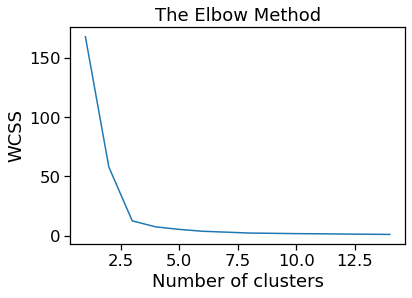

In [91]:
wcss=[]
for i in range (1,15):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [92]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(reduced)

KMeans(n_clusters=5, random_state=42)

In [93]:
label=model.labels_
label

array([0, 0, 0, 1, 0, 4, 1, 2, 3, 0, 0, 2, 4, 1, 1, 3, 2, 0, 2, 4, 4, 2,
       4, 0, 3, 1, 0, 4, 1, 2, 1, 1, 1, 4, 3, 2, 3, 4, 4, 4, 2, 4, 2, 4,
       3, 2, 4, 2, 0, 2, 2, 3, 3, 1, 0])

In [94]:
centroid=model.cluster_centers_
centroid

array([[-1.08362545, -1.01195926],
       [ 2.94223457, -0.5843033 ],
       [ 0.0549128 ,  1.48298444],
       [-0.79976513,  0.42860101],
       [-0.90909316, -0.44100161]])

In [95]:
clusters=model.labels_.tolist()
clusters

[0,
 0,
 0,
 1,
 0,
 4,
 1,
 2,
 3,
 0,
 0,
 2,
 4,
 1,
 1,
 3,
 2,
 0,
 2,
 4,
 4,
 2,
 4,
 0,
 3,
 1,
 0,
 4,
 1,
 2,
 1,
 1,
 1,
 4,
 3,
 2,
 3,
 4,
 4,
 4,
 2,
 4,
 2,
 4,
 3,
 2,
 4,
 2,
 0,
 2,
 2,
 3,
 3,
 1,
 0]

In [96]:
label=model.labels_
score=silhouette_score(reduced,label)
score

0.5522119325752366

In [97]:
reduced['cluster']=clusters
reduced['name']=names
reduced.columns=["x",'y','cluster','name']
reduced.head()

,x,y,cluster,name
0,-1.482137,-1.287998,0,L. Messi
1,-1.180190,-0.894344,0,Cristiano Ronaldo
2,-1.335542,-1.460300,0,Neymar Jr
3,2.974839,-0.789651,1,J. Oblak
4,-1.207091,-1.249757,0,E. Hazard


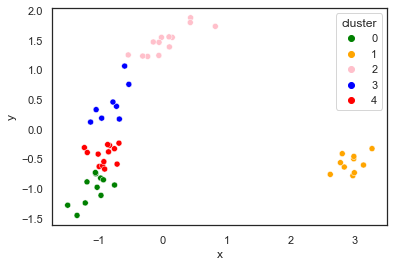

In [98]:
sns.set(style="white")
ax = sns.scatterplot(x="x", y="y", hue='cluster',palette=['green','orange','pink','blue','red'], 
                     legend='full', data = reduced)




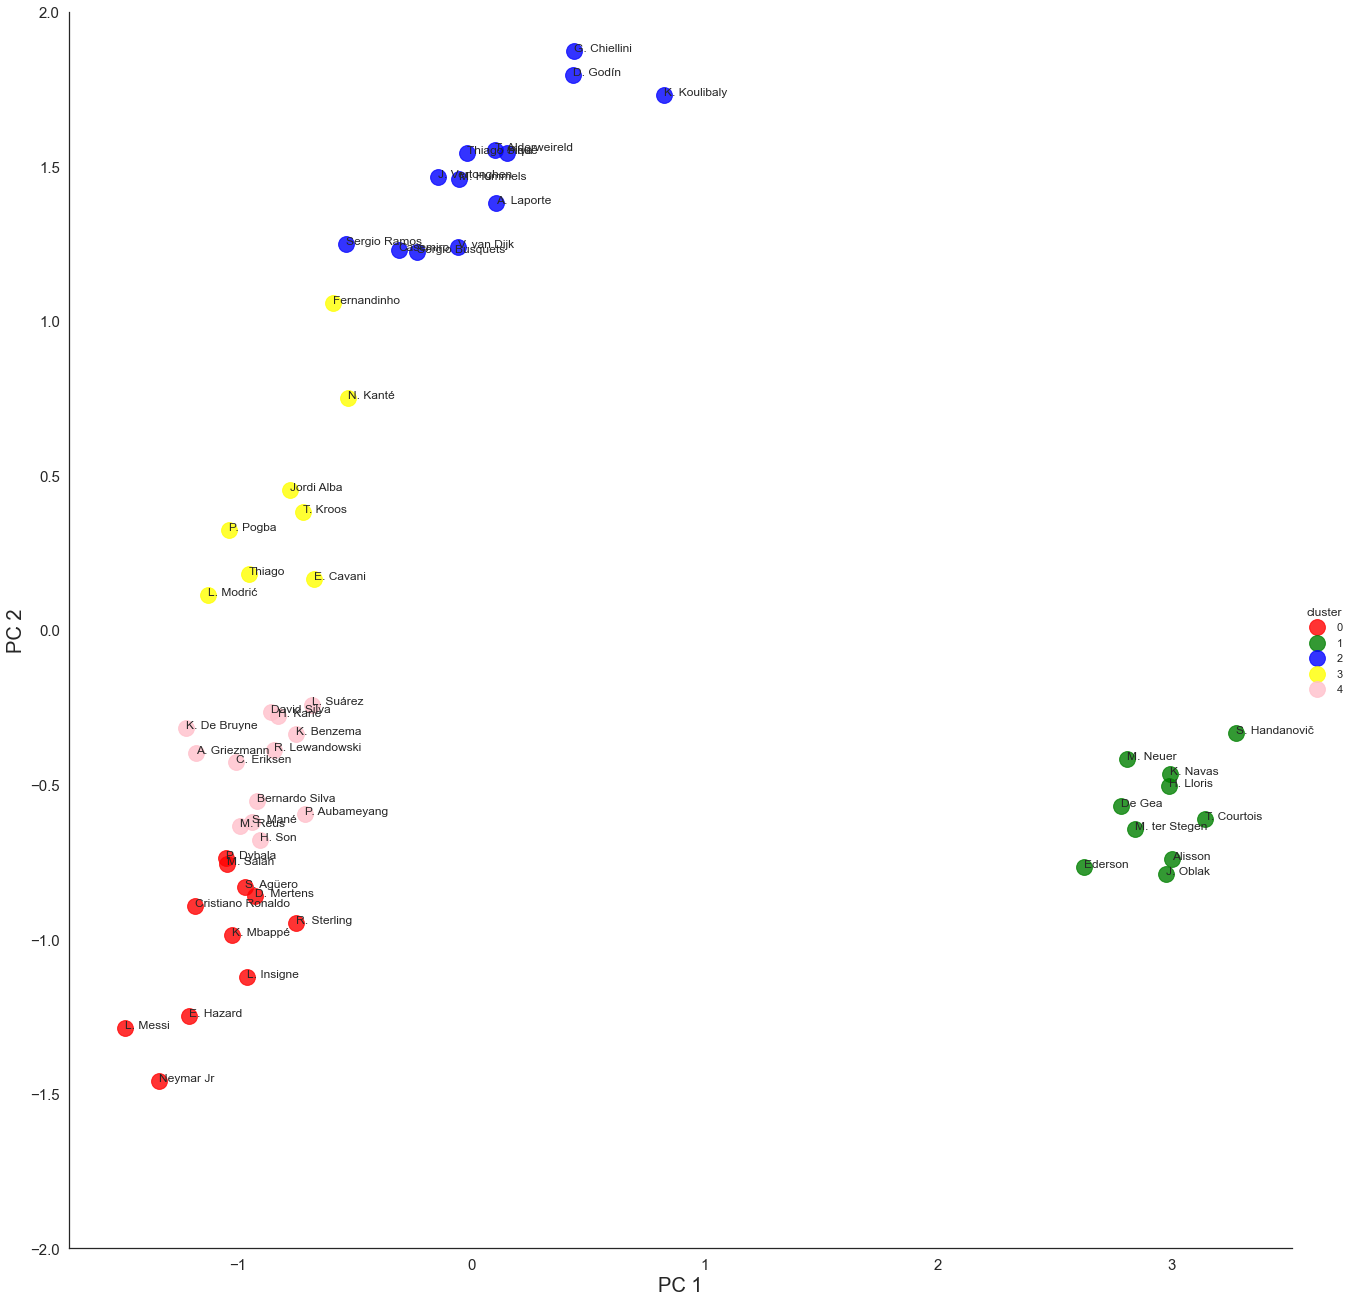

In [99]:
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, palette=['red','green',"blue",'yellow',"pink"], legend='full',fit_reg=False ,size = 18, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)
plt.show()


### insights: 
* There are 5 clusters and clusters are formed according to player's position
* Green cluster represents all goalkeepers.
* Red cluster represents all strikers or attacking players
* Pink cluster represents winger or forward players
* Yellow cluster represents midfield players
* Blue cluster represents defensive players

### Conclusion
* Max age of players= 42, min age of players= 16
* M Greenwood is only youngest player of 17 yrs with wage_eur 6000 euros.
* Maximum players are of age 22yrs
* M greenwood is the only youngest player of 17 yrs whose wage_eur is 6000 which is more than 5000euro
* Most of the players are from England followed by Germany and spain in this dataset
* Around 92% players have International Reputation as 1 which is not so good & .03% players have 5 which is topmost rating
* G. Chiellini and V. van Dijk are topmost defenders
* B. Al Mutairi is the lightest player of weight 50 kg and A. Akinfenwa is the heaviest player of weight 110 kg
* Features like stamina, passing, dribbling, pace increases till certain age(around 30) after which it goes down.
* N. Barrios is the shortest player of height 156 cm and T. Holý is the tallest player of height 205 
* Mean height  of player's is 181.3 cm 
* J.Oblak has maximum overall rating among goalkeepers
* Value in euro increases as overall rating increases and players of lesser age with higher overall rating have higher value in euros.
* Most players Prefer Right foot while playing
* Top overall : L. Messi(94) 
* Top potential : K. Mbappé(95)
* Top value_eur : Neymar Jr( 105500000 )
* Top wage_eur : L. Messi(565000)
* Top shooting skills :Ronaldo(93)
* Players whose overall>86 are divided into 5 clusters according to their positions in the field